Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 3 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [55]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'png' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
# import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


Загрузим датасет

In [56]:
dfMovies = pd.read_csv('tmdb_5000_movies.csv')
print(dfMovies.shape)

(4803, 20)


Посмотрим какие данные он содержит

In [57]:
dfMovies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Отобразим какого типа эти днные

In [58]:
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

Отчистим данные от строк где бюджет меньше 10000 долларов, так как скорее всего они не валидны

In [59]:
dfCleaned = dfMovies[dfMovies.apply( lambda x : x['budget'] > 10000 , axis = 1 )]

Попробуем посмотреть зависимость Бюджета выделенного на фильм и Оценки которые этот фильм получил

In [154]:
df1 = dfCleaned[["budget", "vote_average"]].sort_index(ascending=True)

In [157]:
import seaborn as sns

Посмотрим на распределение оценок

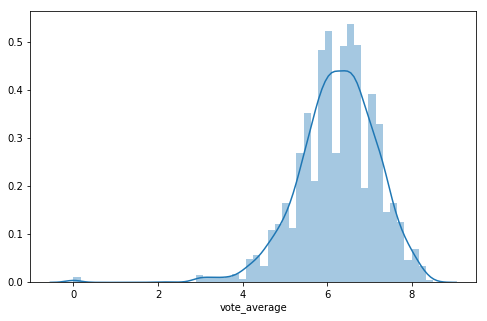

In [159]:
sns.distplot(df1.vote_average);

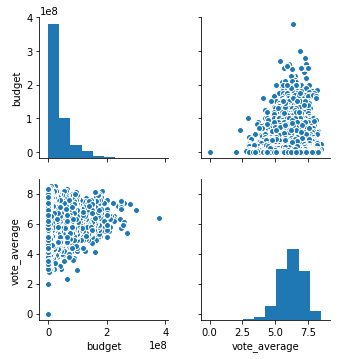

In [62]:
sns_plot = sns.pairplot(df1);
sns_plot

Видим что четкой зависимости нет

Попробуем посмотреть другие зависимости и данные

In [63]:
from datetime import datetime


Сгруппируем данные по годам и посмотрим как менялись бюджеты фильмов в зависимости от года

In [64]:
def convertDate(x):
    '''Добавим колонку с годами, и поместим в нее год выпуска без месяцев и дней'''
    x['release_date_year'] = datetime.strptime(x['release_date'], "%Y-%m-%d").date().year
    return x

released_years_df = dfCleaned.apply(convertDate , axis = 1)

Сгруппируем по новой колонке с годами

In [65]:
dfGroup = released_years_df.groupby('release_date_year')

Просуммируем бюджеты по годам

In [66]:
dfDateBudget = dfGroup['budget'].sum()
dfDateBudget.sort_values(ascending = False )
dfDateBudget.head()

release_date_year
1916      385907
1925      245000
1927    92620000
1929      379000
1930     3950000
Name: budget, dtype: int64

Проинициализируем библиотеку plotly

In [67]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [68]:
trace0 = go.Scatter(
    x=dfDateBudget.index,
    y=dfDateBudget.values,
    name='Budget'
)

data = [trace0]
layout = go.Layout(
    title= 'Relations budget of years',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Years',
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Budget',
        gridwidth= 2,
    ),
    showlegend= False
)

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

Отобразим размер бюджета в зависимости от жанра, для этого нам потребуется вытащить жанры в отдельные колонки

In [138]:
import json

In [139]:
def jsonToDict(x):
    '''
    Пример json с жанрами:
    [{"id": 28, "name": "Action"}, {"id": 12, 
    '''
    js = json.loads(x)
    return js
    

Пройдем по всем фильмам, посмотрим их жанры и при встрече с неизвестным жанром добавит соответствующуюколонку

In [153]:
data = {}

for index, row in released_years_df.iterrows():
    js = jsonToDict(row.genres)
    for i in js:
        if i['name'] not in data:
            data[i['name']] = i['name']
            released_years_df[i['name']] = 0

Подготовим метод который будет записывать 1 если этот фильм соответствует найденному жанру

In [141]:
def applyGenres(x):
    js = jsonToDict(x.genres)
    for i in js:
        x[i['name']] = 1
    return x

Применим заполнение жанров

In [142]:
releasedGenres = released_years_df.apply(applyGenres , axis=1)

Посмотрим на примере одного фильма что у нас записалось

In [152]:
releasedGenres.iloc[50:51, 20:]

,release_date_year,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,...,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
50,2010,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [131]:
genresData = []
for genre in data:
    genresData.append(
        go.Box(y=releasedGenres[releasedGenres[genre]==1].budget, name=genre)
    )
iplot(genresData, show_link = False, )

In [167]:
list(data.values())

['Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western',
 'Comedy',
 'Romance',
 'Horror',
 'Mystery',
 'History',
 'War',
 'Music',
 'Documentary',
 'Foreign',
 'TV Movie']

Посморим изменение количества фильмов принадлежащих разным жанрам по годам

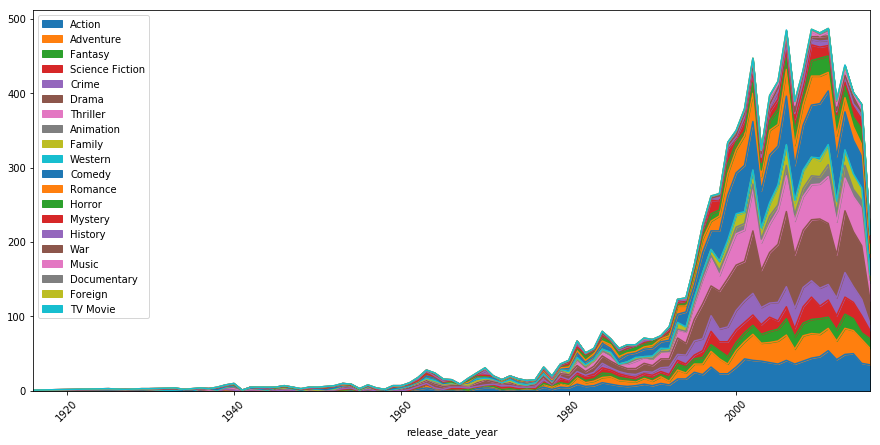

In [188]:
rcParams['figure.figsize'] = 15,7

columnsNames = list(data.values())
r = releasedGenres.groupby('release_date_year')[columnsNames].sum().plot(kind='area', rot=45, stacked=True);


Сравним сколько всего за все время было выпущено разных жанров

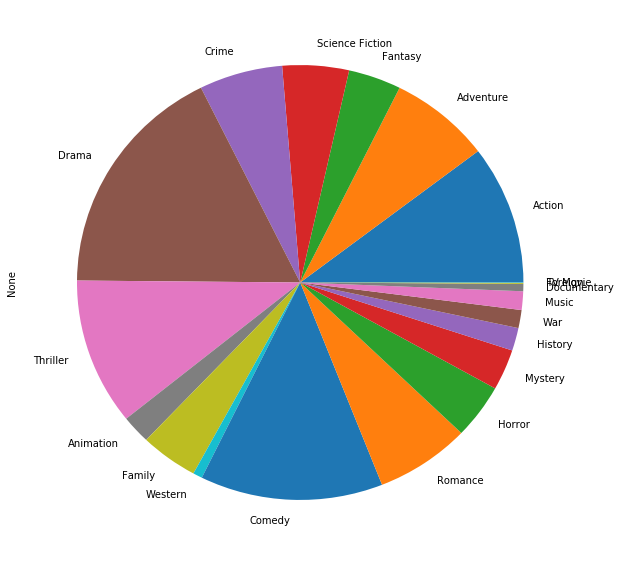

In [191]:
allGenres = releasedGenres[columnsNames].sum()

allGenres.plot.pie(figsize=(10, 10))
